In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

customer_churn_df = pd.read_csv('customer_churn.csv')
customer_churn_df['churn'] = np.where(customer_churn_df['churn'] == "Yes" , 1 ,0)

# Plotting the Churns based on 'avg_weekly_usage_hours' and 'last_login_days_ago'

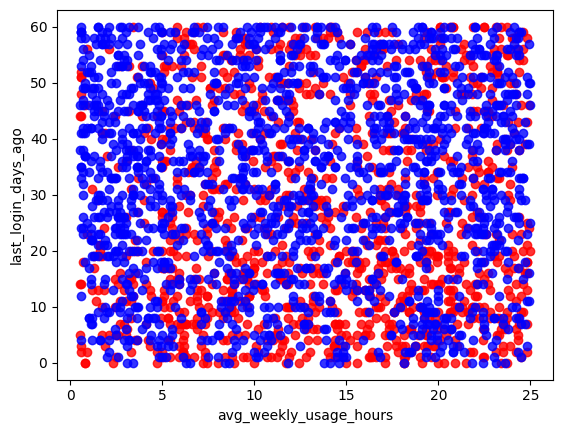

In [8]:
churn_true = customer_churn_df[customer_churn_df['churn'] == 1]
churn_false = customer_churn_df[customer_churn_df['churn'] == 0]

# For False
plt.scatter(
    churn_false['avg_weekly_usage_hours'],
    churn_false['last_login_days_ago'],
    color='red',
    label='Churn = False',
    alpha=0.8
)

# For True
plt.scatter(
    churn_true['avg_weekly_usage_hours'],
    churn_true['last_login_days_ago'],
    color='blue',
    label='Churn = False',
    alpha=0.8
)

plt.xlabel("avg_weekly_usage_hours")
plt.ylabel("last_login_days_ago")
plt.show()


# K neighbor classification stuff

In [9]:
feature = customer_churn_df[['avg_weekly_usage_hours','last_login_days_ago']].values
target = customer_churn_df[['churn']].values

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(feature,target)

feature_new = np.array([[3.5, 40],
                        [18.2, 2],
                        [9.8, 15]])


predictions = knn.predict(feature_new)

print('Predictions: {}'.format(predictions))


Predictions: [1 0 0]


f:\mubashir\Coding\Machine Learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Training and splitting data

In [21]:
from sklearn.model_selection import train_test_split

feature_train , feature_test , target_train , target_test = train_test_split(feature,target,
                                                                            test_size=0.3,
                                                                            random_state=21,
                                                                            stratify=target)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(feature_train,target_train)
print(knn.score(feature_test,target_test))

target_train = target_train.ravel()
target_test = target_test.ravel()

0.530952380952381


f:\mubashir\Coding\Machine Learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Model complexity and over/underfitting 

(1960,)


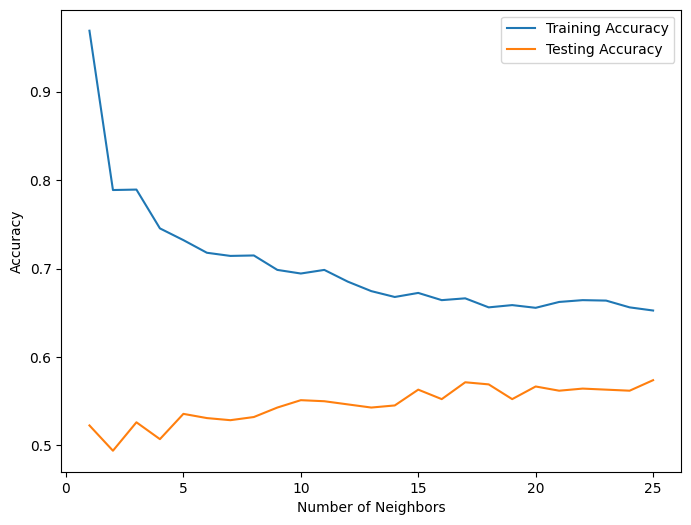

In [ ]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1,26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(feature_train,target_train)
    train_accuracies[neighbor] = knn.score(feature_train,target_train)
    test_accuracies[neighbor] = knn.score(feature_test,target_test)

plt.figure(figsize=(8,6))
plt.plot(neighbors,train_accuracies.values(),label='Training Accuracy')
plt.plot(neighbors,test_accuracies.values(),label='Testing Accuracy')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()